## Diagnóstico médico baseado em relatos de pacientes

### Instalação e importação das bibliotecas

In [24]:
!python -m spacy download pt_core_news_sm

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ----------------------- ---------------- 7.6/13.0 MB 42.7 MB/s eta 0:00:01
     --------------------------------------- 13.0/13.0 MB 45.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode

pln = spacy.load('pt_core_news_sm')

### Carregamento do dataset

In [26]:
df = pd.read_csv('../dataset/sintomas_doencas_cardiacas.csv', sep=';')
df.head()

,frase,diagnostico,risco
0,"Há três dias, estou sentindo dores fortes no p...",Infarto,Alto Risco
1,"Há pelo menos uma semana, venho apresentando u...",Insuficiência Cardíaca,Baixo Risco
2,"De repente, há dois dias, comecei a ter falta ...",Angina,Alto Risco
3,"Há quatro dias, sinto palpitações cardíacas fo...",Arritmia,Alto Risco
4,"Há uma semana, tenho uma sensação constante de...",Infarto,Alto Risco


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   frase        10 non-null     object
 1   diagnostico  10 non-null     object
 2   risco        10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


Text(0, 0.5, 'Contagem')

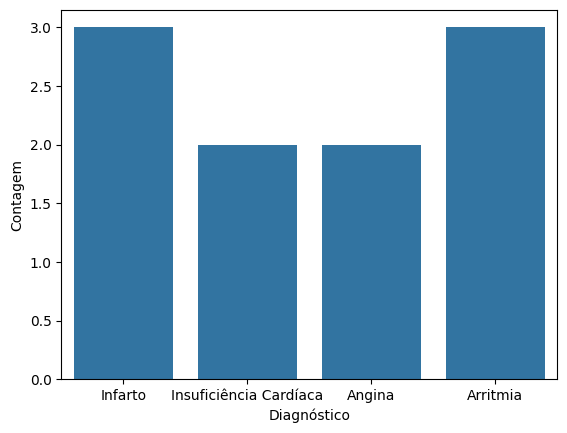

In [28]:
sns.countplot(df, x='diagnostico')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')

### Pré-processamento dos dados textuais

In [29]:
def text_processing(txt: str):
    """_summary_

    Args:
        txt (str): Texto a ser processado
        
    - Normaliza para minúsculas.
    - Remove stopwords, pontuações, acentuações e digítos numéricos.
    - Padroniza as palavras com a Lematização.
    """
    txt = txt.lower()
    doc = pln(txt)
    
    words: list[str] = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            words.append(token.lemma_)
    
    words = ' '.join(unidecode(word) for word in words)
    return words

In [30]:
df['frase_processada'] = df['frase'].apply(text_processing)
df.head()

,frase,diagnostico,risco,frase_processada
0,"Há três dias, estou sentindo dores fortes no p...",Infarto,Alto Risco,haver dia sentir dor forte peito pior esforco ...
1,"Há pelo menos uma semana, venho apresentando u...",Insuficiência Cardíaca,Baixo Risco,haver semana venho apresentar cansaco extremo ...
2,"De repente, há dois dias, comecei a ter falta ...",Angina,Alto Risco,repente haver dia comecar ar subito dificuldad...
3,"Há quatro dias, sinto palpitações cardíacas fo...",Arritmia,Alto Risco,haver dia sinto palpitacao cardiaca forte cora...
4,"Há uma semana, tenho uma sensação constante de...",Infarto,Alto Risco,haver semana sensacao constante aperto torax p...
